Importing Required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report



Dataset Loading


In [2]:
# Load the dataset
data =pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
print(data)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will ?_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
print("null values:\n",data.isnull().sum())

null values:
 v1    0
v2    0
dtype: int64


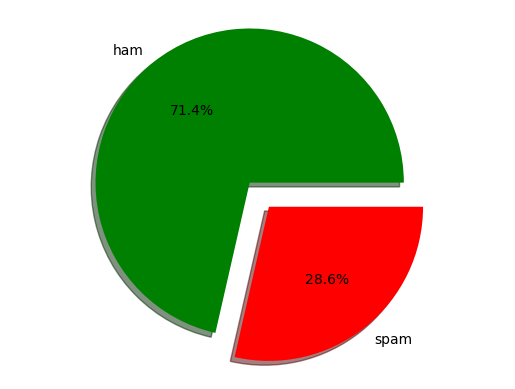

In [6]:
count_Class = pd.value_counts(data.v2, sort = True)

# Data to Plot
v2 = 'ham', 'spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = v2, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

In [7]:

maplabels={'ham':0,'spam':1}
data['v1']=data['v1'].map(maplabels)


vectorizing the data


In [8]:
# Data preprocessing
# e.g., removing special characters, tokenization, etc.

# Feature engineering
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1']

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model selection and training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Model evaluation
predictions = model.predict(X_test)
print("Accuracy: {} %".format(accuracy_score(y_test, predictions)*100))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 96.23318385650225 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



We use the confusion matrix to observe the performance of our model.

In [14]:
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(y_test,predictions)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, predictions) * 100))
print("\n", confusionmatrix)

The accuracy of Naive Bayes clasifier is 96.23318385650225%

 [[965   0]
 [ 42 108]]


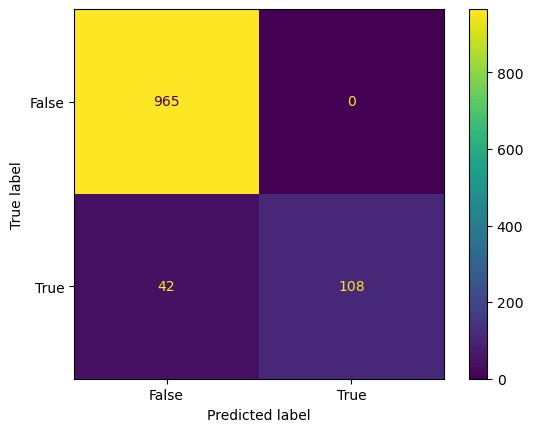

In [15]:

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Now we want to test our model mbn with a new Sms/Email massage


If the output is 0, it means that the input message is not spam(i.e..,ham), and if it is 1, it means that message has been spam.

In [16]:
new_ham = ["Hi, I'm Mohammad Nabizadeh and I am glad to share the program that I've written with everyone."]
new_spam= ["Congratulations, you've won a free Sony camera."]
    
new_ham_vectorized = tfidf_vectorizer.transform(new_ham)
    
new_spam_vectorized = tfidf_vectorizer.transform(new_spam)     

In [17]:
# Example predictions
sample_predict = model.predict(new_ham_vectorized)
if 0 in sample_predict:
    print("ham")
else:
    print("spam")


ham


In [18]:
# Example predictions
sample_predict = model.predict(new_spam_vectorized)
if 0 in sample_predict:
    print("ham")
else:
    print("spam")

spam
